# 2-1 Rの基本

2
2
12
1.3333333333333333
1024
3
2.0
[1 2 3 4 5]
[ 1  2  3  4  5  6  7  8  9 10]
      Col1  Col2  Col3  Col4  Col5
Row1     1     2     3     4     5
Row2     6     7     8     9    10
      Col1  Col2  Col3  Col4  Col5
Row1     1     2     3     4     5
Row2     6     7     8     9    10
[[[ 1  2]
  [ 3  4]
  [ 5  6]
  [ 7  8]
  [ 9 10]]

 [[11 12]
  [13 14]
  [15 16]
  [17 18]
  [19 20]]

 [[21 22]
  [23 24]
  [25 26]
  [27 28]
  [29 30]]]
  col1  col2
0    A     1
1    B     2
2    C     3
3    D     4
4    E     5
5
{'chara': array(['A', 'B', 'C'], dtype='<U1'), 'matrix':       Col1  Col2  Col3  Col4  Col5
Row1     1     2     3     4     5
Row2     6     7     8     9    10, 'df':   col1  col2
0    A     1
1    B     2
2    C     3
3    D     4
4    E     5}
1
2
3
Col1    1
Col2    2
Col3    3
Col4    4
Col5    5
Name: Row1, dtype: int64
Row1    1
Row2    6
Name: Col1, dtype: int64
Col2    2
Col3    3
Col4    4
Name: Row1, dtype: int64
(2, 5)
(3, 5, 2)
(['Row1', 'Row2'], ['Col1',

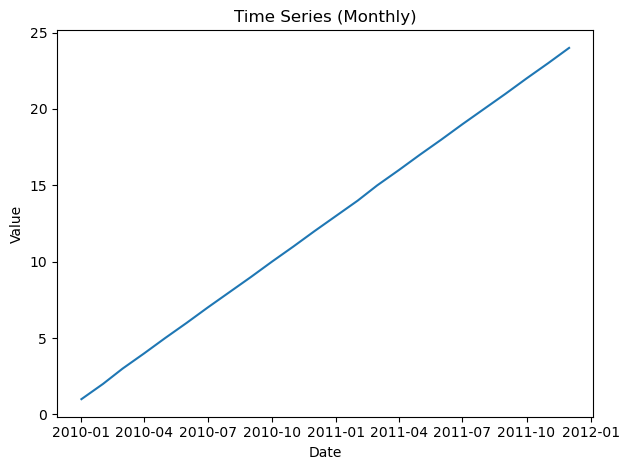

  species  body_length  feather_length
0    crow         55.4            98.2
1    crow         45.9            88.7
2    crow         56.3           102.4
[-1.29408532]
[-1.03878821]
[1.62434536]
[1.62434536]
[1.62434536]
[-0.61175641]
[1.62434536]
[-0.61175641]
1
2
3
[ 1.62434536 -0.61175641 -0.52817175]
[ 1.62434536  9.38824359 -5.52817175]
外部パッケージは pip でインストールしてください（例: pip install pandas seaborn numpyro arviz）
観測データサイズ: 50, 平均≈3.013, 標準偏差≈1.202


C:\Users\treme\AppData\Local\Temp\ipykernel_14432\3591242046.py:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result_vec_1[i] = np.random.normal(0, 1, 1)
C:\Users\treme\AppData\Local\Temp\ipykernel_14432\3591242046.py:205: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result_vec_2[i] = np.random.normal(mean_vec[i], 1, 1)


NumPyroのモデル図を 'bayes_model.svg' として保存しました。


C:\Users\treme\AppData\Local\Temp\ipykernel_14432\3591242046.py:251: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(kernel, num_warmup=1000, num_samples=2000, num_chains=2, progress_bar=False)



                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      3.01      0.18      3.01      2.73      3.29   2709.47      1.00
     sigma      1.23      0.14      1.22      1.02      1.44   2796.27      1.00

Number of divergences: 0


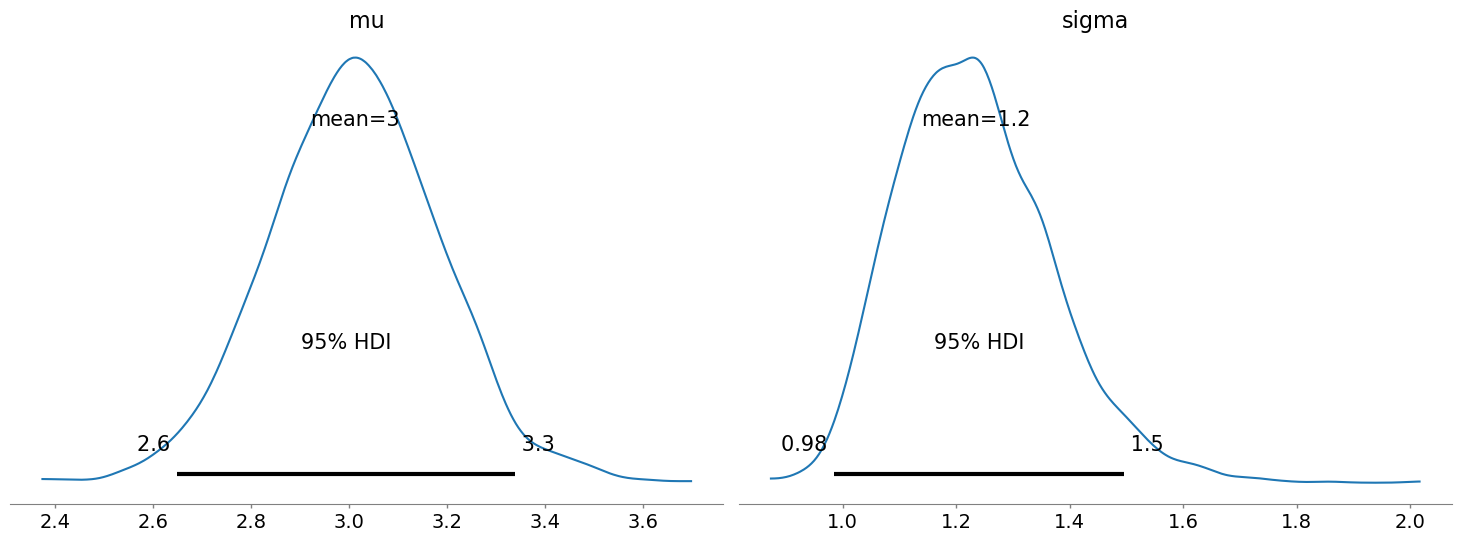

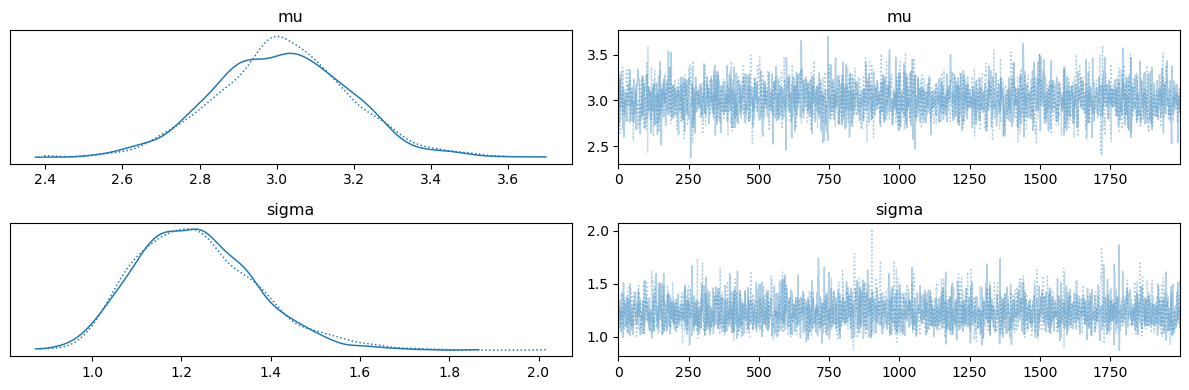

In [2]:
# -*- coding: utf-8 -*-
# Rの基本｜RとStanではじめる ベイズ統計モデリングによるデータ分析入門
# 馬場真哉
# --- Python 版 ---

# 必要パッケージ
# pip install numpy pandas matplotlib seaborn arviz numpyro jax jaxlib graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

import jax
import jax.random as random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
from numpyro import render_model

# 表示設定（任意）
pd.set_option("display.width", 120)
pd.set_option("display.max_columns", 20)

# ------------------------------------------------------------------------------
# RStudioの使い方 → 四則演算
# ------------------------------------------------------------------------------
print(1 + 1)
print(3 - 1)
print(3 * 4)
print(8 / 6)
print(2 ** 10)  # Rの ^ は Python では **

# これは実行されない
# print(1 + 1)

# ------------------------------------------------------------------------------
# 変数
# ------------------------------------------------------------------------------
x = 2
print(x + 1)

# ------------------------------------------------------------------------------
# 関数
# ------------------------------------------------------------------------------
print(np.sqrt(4))

# ------------------------------------------------------------------------------
# ベクトル（Pythonでは主にnumpy配列を使用）
# ------------------------------------------------------------------------------
vector_1 = np.array([1, 2, 3, 4, 5])
print(vector_1)

# 等差数列
print(np.arange(1, 11))  # 1:10

# ------------------------------------------------------------------------------
# 行列（行名・列名を付ける用途は pandas.DataFrame が便利）
# ------------------------------------------------------------------------------
matrix_1_np = np.arange(1, 11).reshape(2, 5, order="C")  # byrow=TRUE 相当
matrix_df = pd.DataFrame(
    matrix_1_np,
    index=["Row1", "Row2"],
    columns=["Col1", "Col2", "Col3", "Col4", "Col5"]
)
print(matrix_df)

# 行名と列名の確認
print(matrix_df)

# ------------------------------------------------------------------------------
# 配列（3次元）
# ------------------------------------------------------------------------------
array_1 = np.arange(1, 31).reshape(3, 5, 2, order="C")  # dim=(3,5,2)
print(array_1)

# ------------------------------------------------------------------------------
# データフレーム
# ------------------------------------------------------------------------------
data_frame_1 = pd.DataFrame({
    "col1": ["A", "B", "C", "D", "E"],
    "col2": [1, 2, 3, 4, 5]
})
print(data_frame_1)

# 行数
print(data_frame_1.shape[0])

# ------------------------------------------------------------------------------
# リスト(list)（Pythonでは dict や list で表現）
# ------------------------------------------------------------------------------
list_1 = {
    "chara": np.array(["A", "B", "C"]),
    "matrix": matrix_df,
    "df": data_frame_1
}
print(list_1)

# ------------------------------------------------------------------------------
# データの抽出（Python は 0始まりのインデックスに注意）
# ------------------------------------------------------------------------------
# vectorの特定の値を取得（Rの vector_1[1] 相当は Python では [0]）
print(vector_1[0])

# matrixの場合（ここではDataFrameで再現）
print(matrix_df.iloc[0, 1])        # R: matrix_1[1,2]
print(array_1[0, 1, 0])            # R: array_1[1,2,1]

# 特定行・列
print(matrix_df.iloc[0, :])        # R: matrix_1[1,]
print(matrix_df.iloc[:, 0])        # R: matrix_1[,1]

# 特定範囲
print(matrix_df.iloc[0, 1:4])      # R: matrix_1[1,2:4]

# 要素数など
print(matrix_df.shape)
print(array_1.shape)

# 行名と列名
print((matrix_df.index.tolist(), matrix_df.columns.tolist()))

# 行名と列名を指定して抽出
print(matrix_df.loc["Row1", "Col1"])

# 特定列の抽出
print(data_frame_1["col2"])

# 特定列の特定要素
print(data_frame_1["col2"].iloc[1])  # R: data_frame_1$col2[2]

# 先頭行
print(data_frame_1.head(2))

# listの場合の抽出
print(list_1["chara"])
print(list(list_1.values())[0])  # Rの [[1]] 的な「最初の要素」をざっくり再現

# ------------------------------------------------------------------------------
# 時系列データ：ts（pandas の DatetimeIndex を使用）
# ------------------------------------------------------------------------------
data_frame_2 = pd.DataFrame({"data": np.arange(1, 25)})

ts_index = pd.date_range(start="2010-01-01", periods=24, freq="MS")  # 月初基準
ts_1 = pd.Series(data_frame_2["data"].values, index=ts_index)
print(ts_1)

# 可視化（matplotlib / seaborn）
plt.figure()
sns.lineplot(x=ts_1.index, y=ts_1.values)
plt.title("Time Series (Monthly)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# ファイルからのデータの読み込み（CSVは pandas で）
# ------------------------------------------------------------------------------
try:
    birds = pd.read_csv("2-1-1-birds.csv")
    print(birds.head(3))
except FileNotFoundError:
    print("CSVファイル '2-1-1-birds.csv' が見つかりません。実行フォルダに配置してください。")

# ------------------------------------------------------------------------------
# 乱数の生成（numpy.random）
# ------------------------------------------------------------------------------
# 平均0、標準偏差1の正規分布乱数を1つ
print(np.random.normal(loc=0, scale=1, size=1))
print(np.random.normal(loc=0, scale=1, size=1))

# 乱数の固定
np.random.seed(1)
print(np.random.normal(0, 1, 1))
np.random.seed(1)
print(np.random.normal(0, 1, 1))

# さらに確認
np.random.seed(1)
print(np.random.normal(0, 1, 1))
print(np.random.normal(0, 1, 1))
np.random.seed(1)
print(np.random.normal(0, 1, 1))
print(np.random.normal(0, 1, 1))

# ------------------------------------------------------------------------------
# 繰り返し構文とforループ
# ------------------------------------------------------------------------------
for i in range(1, 4):
    print(i)

# 要素番号を変えながら実行
result_vec_1 = np.zeros(3)
np.random.seed(1)
for i in range(3):
    result_vec_1[i] = np.random.normal(0, 1, 1)
print(result_vec_1)

# 平均値を変えながら
result_vec_2 = np.zeros(3)
mean_vec = np.array([0, 10, -5])
np.random.seed(1)
for i in range(3):
    result_vec_2[i] = np.random.normal(mean_vec[i], 1, 1)
print(result_vec_2)

# ------------------------------------------------------------------------------
# 外部パッケージの活用（Rの install.packages("tidyverse") 的な例示）
# Pythonでは pip でインストールします（例）:
#   pip install pandas seaborn numpyro arviz
# ------------------------------------------------------------------------------
print("外部パッケージは pip でインストールしてください（例: pip install pandas seaborn numpyro arviz）")

# ==============================================================================
# ここからベイズ推定（NumPyro）
#  - モデル可視化：NumPyroの組み込み関数 render_model を使用
#  - 事後分布の可視化：ArviZ を使用
# ==============================================================================

# 観測データ（例）：平均3・標準偏差1の正規データを生成
np.random.seed(123)
y_np = np.random.normal(loc=3.0, scale=1.0, size=50)
print(f"観測データサイズ: {y_np.size}, 平均≈{y_np.mean():.3f}, 標準偏差≈{y_np.std(ddof=1):.3f}")

# NumPyro モデル定義
def normal_model(y=None):
    mu = numpyro.sample("mu", dist.Normal(0, 10))
    sigma = numpyro.sample("sigma", dist.HalfNormal(5))
    with numpyro.plate("N", y.shape[0]):
        numpyro.sample("obs", dist.Normal(mu, sigma), obs=y)

# モデルの可視化（NumPyro組み込み）
try:
    g = render_model(
        normal_model,
        model_args=(),
        model_kwargs={"y": y_np},
        render_distributions=True,
        render_params=True
    )
    # Graphviz の利用環境があればSVGを書き出し可能
    g.render(filename="bayes_model", format="svg", cleanup=True)
    print("NumPyroのモデル図を 'bayes_model.svg' として保存しました。")
except Exception as e:
    print(f"モデル図のレンダリングをスキップしました（理由: {e}）。Graphvizの導入が必要な場合があります。")

# 乱数キーとMCMC設定
key = random.PRNGKey(0)
kernel = NUTS(normal_model)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=2000, num_chains=2, progress_bar=False)
mcmc.run(key, y=y_np)
mcmc.print_summary()  # NumPyro 組み込みのテキスト要約（参考：可視化ではないが実務で有用）

# ArviZ に変換して可視化（事後分布）
idata = az.from_numpyro(mcmc)

# 事後分布のプロット（ArviZ）
az.plot_posterior(idata, var_names=["mu", "sigma"], hdi_prob = 0.95)
plt.tight_layout()
plt.show()

# トレースプロット（ArviZ）
az.plot_trace(idata, var_names=["mu", "sigma"])
plt.tight_layout()
plt.show()
